In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline

## Imports

## Данные

Датасет содержит характеристики квартир в калифорнии и цены на них

In [22]:
csv_path = 'housing.csv'
data = pd.read_csv(csv_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
print("Dataframe shape:", data.shape)
print("Dataframe columns:\n", list(data.columns))

Dataframe shape: (20640, 10)
Dataframe columns:
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [24]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [25]:
data.agg(['min', 'max'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,<1H OCEAN
max,-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0,NEAR OCEAN


У входных данных есть пустые значения в колонке total_bedrooms, также необходимо будет нормализовать данные

Рассмотрим корреляцию между особенностями и исключим те, которые имеют коэффициенты больше 0.5 (по модулю):

<AxesSubplot:>

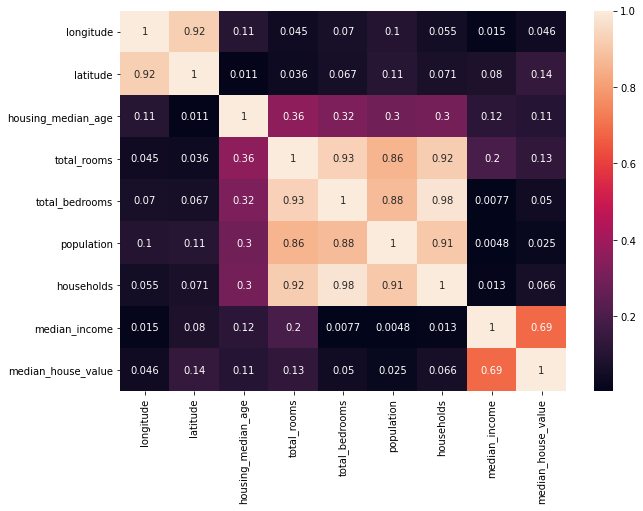

In [26]:
plt.subplots(figsize=(10, 7))
sns.heatmap(data.iloc[:, :-1].corr().abs(), annot=True)

На графике видно, что пары (0, 2), (0, 7), (0, 8), (1, 2), (2, 8) (5, 6), 
(7, 10) имеют коэффициенты больше 0.5. Представляя пары в виде графа, исключим
подряд те вершины, которые имеют наибольшее количество граней (если
у двух вершин количество граней равны, то берем вершины с суммарной 
корреляцией, близкой к 0). Тогда исключаем особенности: `["fixed acidity",
"citric acid", "total sulfur dioxide", "density"]`.


In [27]:
data = data.drop(
    columns=["latitude", "total_bedrooms", "households", "median_house_value", 'population']
)

In [28]:
data

,longitude,housing_median_age,total_rooms,median_income,ocean_proximity
0,-122.23,41.0,880.0,8.3252,NEAR BAY
1,-122.22,21.0,7099.0,8.3014,NEAR BAY
2,-122.24,52.0,1467.0,7.2574,NEAR BAY
3,-122.25,52.0,1274.0,5.6431,NEAR BAY
4,-122.25,52.0,1627.0,3.8462,NEAR BAY
...,...,...,...,...,...
20635,-121.09,25.0,1665.0,1.5603,INLAND
20636,-121.21,18.0,697.0,2.5568,INLAND
20637,-121.22,17.0,2254.0,1.7000,INLAND
20638,-121.32,18.0,1860.0,1.8672,INLAND


<AxesSubplot:>

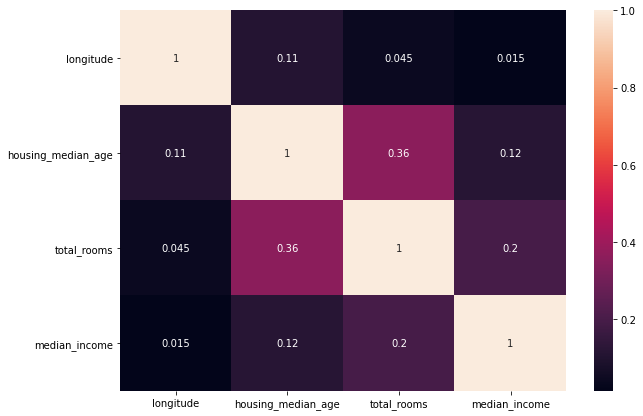

In [29]:
plt.subplots(figsize=(10, 7))
sns.heatmap(data.iloc[:, :-1].corr().abs(), annot=True)

Для 1600 строк данных 6 классов возможно слишком много, поэтому их лучше
сократить до двух - хороший (1) и плохой (0). Разбитие должно произойти так,
чтобы их было максимально поровну:

In [30]:
wines["quality"].plot.hist()
wines["quality"] = wines["quality"].apply(lambda x : 1 if x >= 6 else 0)
wines["quality"].value_counts()

NameError: name 'wines' is not defined

При обучении будут использоваться стандартные метрики:
* **Precision** (точность) - количество правильно классифицированных 
  положительных предметов из выбранных для классификации:
  $$
    precision = \frac{TP}{TP + FP}
  $$
* **Recall** (полнота) - количество правильно классифицированных 
  положительных предметов из всех возможных
  (т.е. множество правильно и неправильно классифицированных предметов):
  $$
    recall = \frac{TP}{TP + FN}
  $$

$TP$ - количество корректно классифицированных положительных предметов,
$FP$ - количество некорректно классифицированных отрицательных предметов,
$TP$ - количество некорректно классифицированных положительных предметов.

Можно также использовать **accuracy** (количество правильно классифицированных
предметов из всех доступных), но её точность малозначима, так как классов 
неравное количество.

In [ ]:
def calc_confusion_matrix(pred, real):
    # y\p  1   0
    #   1 TP  FN
    #   0 FP  TN
    matrix = np.zeros((2, 2))
    for y, p in zip(pred, real):
        matrix[1 - y, 1 - p] += 1
    
    return matrix

def precision(pred, real):
    matrix = calc_confusion_matrix(pred, real)
    if matrix[0, 0] + matrix[1, 0] == 0:
        return 0
    return matrix[0, 0] / (matrix[0, 0] + matrix[1, 0])

def recall(pred, real):
    matrix = calc_confusion_matrix(pred, real)
    if matrix[0, 0] + matrix[0, 1] == 0:
        return 0
    return matrix[0, 0] / (matrix[0, 0] + matrix[0, 1])

## Модель

Модель - логистическая регрессия и **L2** ругляризацией.

In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, *, reg_param=1.0, lr=0.01, max_iter=100):
        self._a  = reg_param
        self._lr = lr
        self._max_iter = max_iter
        self._feat_count = 0
        self._weights = None
        self._bias = 0

    def fit(self, feats, labels):
        if feats.ndim == 1:
            feats = feats[np.newaxis, :]

        if self._weights is None:
            self._feat_count = feats.shape[1]
            self._weights = np.zeros(self._feat_count)
        elif self._feat_count != feats.shape[1]:
            err = f"Feature count does not match previous count {self._feat_count}"
            raise ValueError(err)

        costs      = np.zeros((self._max_iter))
        precisions = np.zeros((self._max_iter))
        recalls    = np.zeros((self._max_iter))

        for i in range(self._max_iter):
            pred = self._predict(feats)

            costs[i] = self._cost(pred, labels)
            precisions[i] = precision(pred.round().astype(int), labels)
            recalls[i] = recall(pred.round().astype(int), labels)

            dw, db = self._gradient(feats, pred, labels)
            self._weights -= dw * self._lr
            self._bias    -= db * self._lr
        
        return {
            "cost": costs,
            "precision": precisions,
            "recall": recalls,
            "max_iter": self._max_iter,
        }

    def predict(self, X):
        return self._predict(X).round()

    def _predict(self, feats):
        weights = self._weights
        bias    = self._bias
        return self._sigmoid( np.dot(feats, weights) + bias )

    def _sigmoid(self, weighted_feats):
        return 1 / (1 + np.exp(-weighted_feats))

    def _gradient(self, feats, p, labels):
        sample_count = len(labels)
        norm_coef = self._a

        dw = np.dot(feats.T, p - labels) / sample_count + norm_coef * self._weights

        coef = np.mean(p - labels)
        db = coef + norm_coef * self._bias

        return (dw, db)
    
    def _cost(self, preds, labels):
        return -1 * np.mean( 
            np.multiply(labels, np.log(preds)) \
            + np.multiply(1 - labels, np.log(1 - preds))
        )        

## Обучение

Разделение данных на обучающую и тренеровочную выборку (данные заранее 
нормализуются):

In [ ]:
from sklearn.model_selection import train_test_split


y = wines['quality']
X = wines.drop(columns=['quality'])

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
    ss.fit_transform(X), y, 
    test_size=0.3, random_state=10
)

Далее обучение модели. Так как обучение происходит обычным градиентым спуском,
то нужно задать побольше итераций.

In [ ]:
custom_model = LogisticRegression(max_iter=200)
graphs = custom_model.fit(X_train, y_train)

plt.plot(graphs["cost"],                      label="Cost")
plt.plot(graphs["precision"], linestyle='--', label="Precision")
plt.plot(graphs["recall"],    linestyle='--', label="Recall")
plt.grid()
plt.legend()

preds = custom_model.predict(X_test).astype(int)

print("Final precision:", precision(preds, y_test))
print("Final recall:", recall(preds, y_test))

На графике видно, что модель обучилась до точности $70\%$ уже за одну итерацию,
после чего она стала медленно дообучаться.

Для сравнения, точность на `LogisticRegression` от `sklearn`

In [ ]:
from sklearn import linear_model

sklearn_model = linear_model.LogisticRegression()

sklearn_model.fit(X_train, y_train)

preds = sklearn_model.predict(X_test).astype(int)

print("Final precision:", precision(preds, y_test))
print("Final recall:", recall(preds, y_test))